## Installation

- If you have previous/other manually installed (= not installed via pip) version of OpenCV installed (e.g. cv2 module in the root of Python's site-packages), remove it before installation to avoid conflicts.
- Run these commands
    - pip3 install opencv-python==3.3.0.10
    - pip3 install opencv-contrib-python==3.3.0.10
- Make sure you install OpenCV - 3, SIFT is avaiable only in older versions of OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
print(cv2.__version__)
import numpy as np

img = cv2.imread('home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
# sift = cv2.SIFT()
kp = sift.detect(gray,None)

img1 = cv2.drawKeypoints(gray,kp,outImage = None, color=(255,0,0))
cv2.imwrite('sift_keypoints.jpg',img1)

img2 = cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,outImage = None, color=(255,0,0))
cv2.imwrite('sift_keypoints1.jpg',img2)

kp, des = sift.detectAndCompute(gray,None);

3.3.0


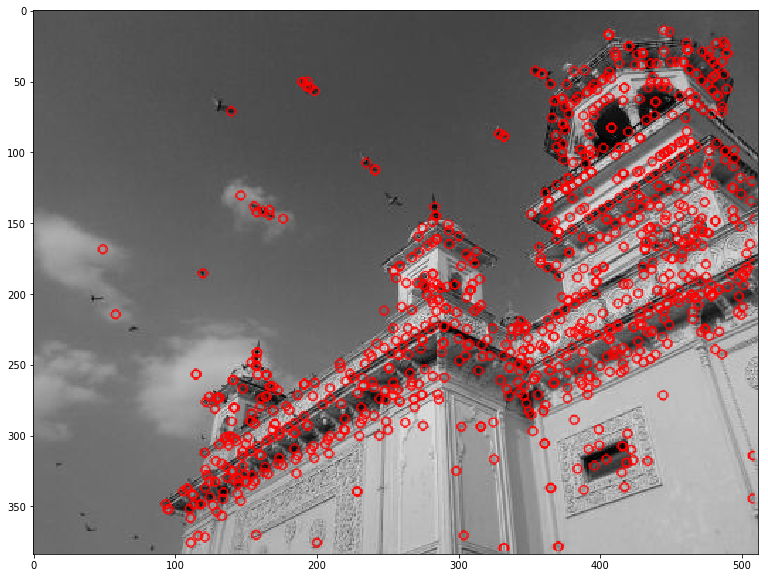

In [3]:
plt.figure(figsize=(15,10));
plt.imshow(img1,cmap = plt.get_cmap('gray'));
plt.show();

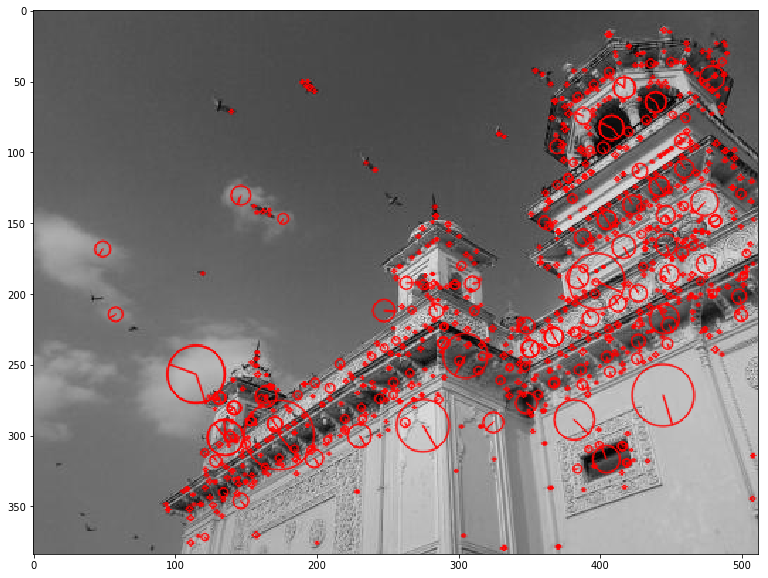

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(img2,cmap = plt.get_cmap('gray'))
plt.show();

## Keypoints of image

In [5]:
print(kp)

[<KeyPoint 0x7f11c9ead9f0>, <KeyPoint 0x7f11c9eada20>, <KeyPoint 0x7f11c9eada50>, <KeyPoint 0x7f11c9eada80>, <KeyPoint 0x7f11c9eadab0>, <KeyPoint 0x7f11c9eadae0>, <KeyPoint 0x7f11c9eadb10>, <KeyPoint 0x7f11c9eadb40>, <KeyPoint 0x7f11c9eadb70>, <KeyPoint 0x7f11c9eadba0>, <KeyPoint 0x7f11c9eadbd0>, <KeyPoint 0x7f11c9eadc00>, <KeyPoint 0x7f11c9eadc30>, <KeyPoint 0x7f11c9eadc60>, <KeyPoint 0x7f11c9eadc90>, <KeyPoint 0x7f11c9eadcc0>, <KeyPoint 0x7f11c9eadcf0>, <KeyPoint 0x7f11c9eadd20>, <KeyPoint 0x7f11c9eadd50>, <KeyPoint 0x7f11c9eadd80>, <KeyPoint 0x7f11c9eaddb0>, <KeyPoint 0x7f11c9eadde0>, <KeyPoint 0x7f11c9eade10>, <KeyPoint 0x7f11c9eade40>, <KeyPoint 0x7f11c9eade70>, <KeyPoint 0x7f11c9eadea0>, <KeyPoint 0x7f11c9eaded0>, <KeyPoint 0x7f11c9eadf00>, <KeyPoint 0x7f11c9eadf30>, <KeyPoint 0x7f11c9eadf60>, <KeyPoint 0x7f11c9eadf90>, <KeyPoint 0x7f11c9eadfc0>, <KeyPoint 0x7f11c9eaf030>, <KeyPoint 0x7f11c9eaf060>, <KeyPoint 0x7f11c9eaf090>, <KeyPoint 0x7f11c9eaf0c0>, <KeyPoint 0x7f11c9eaf0f0>, 

No of keypoints detected

In [6]:
len(kp)

889

x,y co-ordinates of keypoints

In [7]:
for i in kp:
    print(i.pt[0], i.pt[1])

449.08941650390625 14.951162338256836
487.332275390625 21.959993362426758
488.4994201660156 24.397043228149414
461.91961669921875 27.674840927124023
461.91961669921875 27.674840927124023
461.91961669921875 27.674840927124023
445.0812072753906 28.695354461669922
410.6107177734375 29.203853607177734
430.0740966796875 29.90655517578125
430.0740966796875 29.90655517578125
489.5806579589844 30.128280639648438
489.5806579589844 30.128280639648438
411.1963195800781 31.862192153930664
476.5922546386719 32.55508804321289
479.6676025390625 36.1150016784668
413.5791320800781 37.02775192260742
389.10302734375 42.20880889892578
381.5341491699219 42.612003326416016
359.09429931640625 44.74342727661133
359.09429931640625 44.74342727661133
408.0386047363281 47.593902587890625
189.83103942871094 50.25074768066406
189.83103942871094 50.25074768066406
192.20741271972656 52.91144561767578
443.3840026855469 53.33677673339844
434.0407409667969 54.044837951660156
447.9612731933594 54.14619445800781
489.35546

382.546142578125 63.52190017700195
416.103271484375 63.41730880737305
398.9672546386719 66.82398223876953
139.58958435058594 71.10231018066406
438.6039123535156 73.85409545898438
328.80792236328125 86.99043273925781
328.80792236328125 86.99043273925781
368.8455810546875 88.0530014038086
389.0603332519531 101.2644271850586
449.6048583984375 108.04940795898438
445.84033203125 110.38702392578125
434.6177673339844 118.06431579589844
380.2278137207031 124.07492065429688
418.3496398925781 128.6786346435547
413.6517639160156 131.9224395751953
456.262451171875 136.619873046875
465.1248474121094 141.3217315673828
157.694091796875 142.32699584960938
396.6954650878906 143.41600036621094
456.09698486328125 145.03070068359375
494.54364013671875 146.8950958251953
494.54364013671875 146.8950958251953
508.7084045410156 147.3372802734375
416.3327331542969 147.75692749023438
469.7474060058594 148.65345764160156
368.1115417480469 149.1002655029297
499.4444274902344 152.3553466796875
467.521728515625 155.

Size of keypoint : diameter of the meaningful keypoint neighborhood

In [8]:
kp[0].size

2.011176824569702

Angle of keypoint : computed orientation of the keypoint (-1 if not applicable)

In [9]:
kp[0].angle

189.701416015625

## Keypoint Desciptors

Description Matrix => No of keypoints * 128

In [10]:
print(des)

[[42.  4.  1. ...  0.  0.  0.]
 [ 3.  3.  4. ...  3. 35.  8.]
 [ 1.  5. 36. ...  0. 60. 56.]
 ...
 [17.  1.  0. ...  0.  0.  5.]
 [28. 12.  1. ...  1.  0.  0.]
 [21.  0.  0. ...  0.  0.  0.]]


In [11]:
des.shape

(889, 128)

In [12]:
des[0].size

128

## Keypoint Matching

In [13]:
import cv2  
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('t1.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
cv2.imwrite('tsift_keypoints.jpg',img1)

True

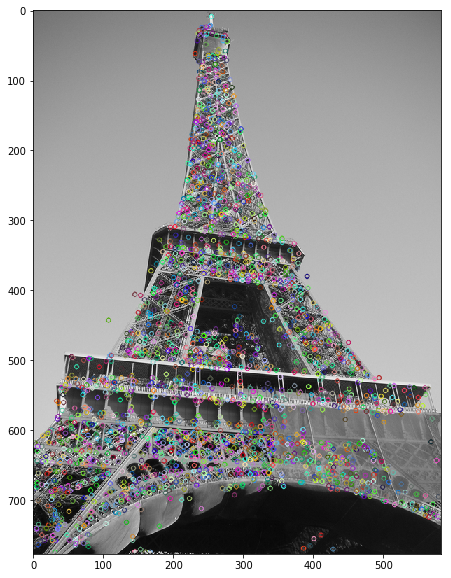

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(img_1,cmap = plt.get_cmap('gray'))
plt.show();

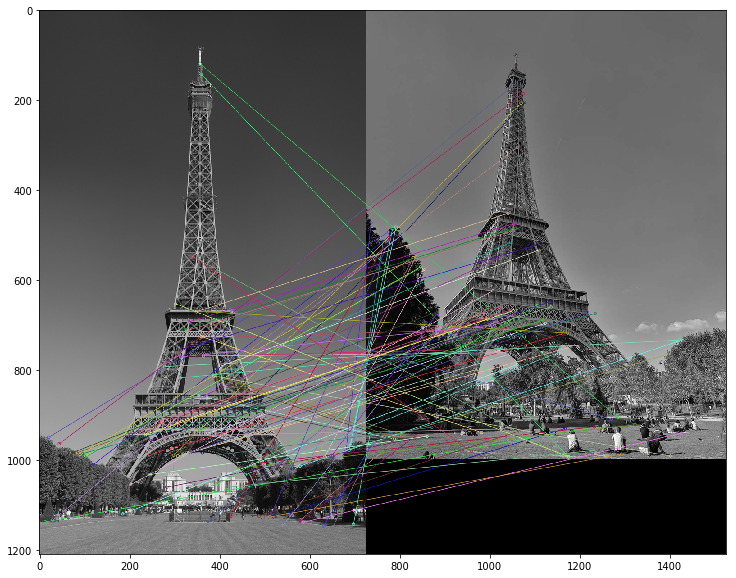

In [16]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('t2.jpg')  
img2 = cv2.imread('t3.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3),plt.show()
cv2.imwrite('tsift_keypointst.jpg',img3);